# Create crystal structure for ML from stable structure 

1. obtain stable structure from materials project
2. create supercell
3. randomly displace atoms while compressing or expanding the cell

In [1]:
# load ASE atom from POSCAR file
from ase.io.vasp import read_vasp
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np
from glob import glob
import pickle

from ase import Atoms
from ase.neighborlist import NeighborList
from ase.build import make_supercell

from ovito.modifiers import CoordinationAnalysisModifier
from ovito.pipeline import StaticSource, Pipeline
from ovito.io.ase import ase_to_ovito

from mlptools.data.structures import generate_crystal
from mlptools.io.write import QuantumEspressoWriter

def get_rdf(ase_atoms, rcut=6, bins=100) -> np.ndarray:
    """get radial distribution function val

    Args:
        rcut (int, optional): cutoff radius. Defaults to 6.
        bins (int, optional): _description_. Defaults to 100.

    Returns:
        np.ndarray: 1st: distance, 2nd: rdf value
    """
    pipeline = Pipeline(source = StaticSource(data=ase_to_ovito(ase_atoms)))
    # modifier = CoordinationAnalysisModifier(cutoff=rcut, number_of_bins=bins, partial=True)
    modifier = CoordinationAnalysisModifier(cutoff=rcut, number_of_bins=bins)
    pipeline.modifiers.append(modifier)
    rdf_table = pipeline.compute().tables['coordination-rdf']
    return rdf_table

In [3]:
# randomly displace atoms while compressing or expanding the cell
path2POSCAR = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/data/POSCAR_amorphous_generation'
original_atoms = read_vasp(path2POSCAR)

In [5]:
print(len(original_atoms.positions)), print(len(make_supercell(original_atoms, [[2,0,0],[0,2,0],[0,0,2]]).positions))

8
64


(None, None)

In [13]:
atoms = make_supercell(original_atoms, [[2,0,0],[0,2,0],[0,0,2]])

for cell_vec in atoms.cell[:]:
    cell_vec_str = [str(i) for i in cell_vec]
    print(" ".join(cell_vec_str))


for position_vec in atoms.get_scaled_positions():
    position_vec_str = [str(np.round(i, 5)) for i in position_vec]
    print(f"Si {' '.join(position_vec_str)}")

10.887404745878905 0.0 0.0
0.0 10.887404745878905 0.0
0.0 0.0 10.887404745878905
Si 0.375 0.375 0.125
Si 0.0 0.25 0.25
Si 0.375 0.125 0.375
Si 0.0 0.0 0.0
Si 0.125 0.375 0.375
Si 0.25 0.25 0.0
Si 0.125 0.125 0.125
Si 0.25 0.0 0.25
Si 0.375 0.375 0.625
Si 0.0 0.25 0.75
Si 0.375 0.125 0.875
Si 0.0 0.0 0.5
Si 0.125 0.375 0.875
Si 0.25 0.25 0.5
Si 0.125 0.125 0.625
Si 0.25 0.0 0.75
Si 0.375 0.875 0.125
Si 0.0 0.75 0.25
Si 0.375 0.625 0.375
Si 0.0 0.5 0.0
Si 0.125 0.875 0.375
Si 0.25 0.75 0.0
Si 0.125 0.625 0.125
Si 0.25 0.5 0.25
Si 0.375 0.875 0.625
Si 0.0 0.75 0.75
Si 0.375 0.625 0.875
Si 0.0 0.5 0.5
Si 0.125 0.875 0.875
Si 0.25 0.75 0.5
Si 0.125 0.625 0.625
Si 0.25 0.5 0.75
Si 0.875 0.375 0.125
Si 0.5 0.25 0.25
Si 0.875 0.125 0.375
Si 0.5 0.0 0.0
Si 0.625 0.375 0.375
Si 0.75 0.25 0.0
Si 0.625 0.125 0.125
Si 0.75 0.0 0.25
Si 0.875 0.375 0.625
Si 0.5 0.25 0.75
Si 0.875 0.125 0.875
Si 0.5 0.0 0.5
Si 0.625 0.375 0.875
Si 0.75 0.25 0.5
Si 0.625 0.125 0.625
Si 0.75 0.0 0.75
Si 0.875 0.875 0.12

In [ ]:
displacement_list = np.linspace(0.05, 0.20, 20)
scale_list = np.linspace(0.6, 1.5, 100)
num_samples = 10000

all_atoms = []
for i in range(num_samples):
    # show progress
    if i % 100 == 0:
        print(f"{i}/ {num_samples}")
    displacement = np.random.choice(displacement_list)
    scale = np.random.choice(scale_list)
    atoms = generate_crystal(original_atoms, displacement, scale, supercell_mtx=[[2,0,0],[0,2,0],[0,0,2]])
    all_atoms.append(atoms)

0/ 10000
100/ 10000
200/ 10000
300/ 10000
400/ 10000
500/ 10000
600/ 10000
700/ 10000
800/ 10000
900/ 10000
1000/ 10000
1100/ 10000
1200/ 10000
1300/ 10000
1400/ 10000
1500/ 10000
1600/ 10000
1700/ 10000
1800/ 10000
1900/ 10000
2000/ 10000
2100/ 10000
2200/ 10000
2300/ 10000
2400/ 10000
2500/ 10000
2600/ 10000
2700/ 10000
2800/ 10000
2900/ 10000
3000/ 10000
3100/ 10000
3200/ 10000
3300/ 10000
3400/ 10000
3500/ 10000
3600/ 10000
3700/ 10000
3800/ 10000
3900/ 10000
4000/ 10000
4100/ 10000
4200/ 10000
4300/ 10000
4400/ 10000
4500/ 10000
4600/ 10000
4700/ 10000
4800/ 10000
4900/ 10000
5000/ 10000
5100/ 10000
5200/ 10000
5300/ 10000
5400/ 10000
5500/ 10000
5600/ 10000
5700/ 10000
5800/ 10000
5900/ 10000
6000/ 10000
6100/ 10000
6200/ 10000
6300/ 10000
6400/ 10000
6500/ 10000
6600/ 10000
6700/ 10000
6800/ 10000
6900/ 10000
7000/ 10000
7100/ 10000
7200/ 10000
7300/ 10000
7400/ 10000
7500/ 10000
7600/ 10000
7700/ 10000
7800/ 10000
7900/ 10000
8000/ 10000
8100/ 10000
8200/ 10000
8300/ 10000
8400

In [ ]:
rdf_list = []
distance = get_rdf(all_atoms[0], bins=150).xy()[:, 0]
for atoms in all_atoms[:100]:
    rdf_list.append(get_rdf(atoms, bins=150).xy()[:, 1])

rdf_list = np.array(rdf_list)

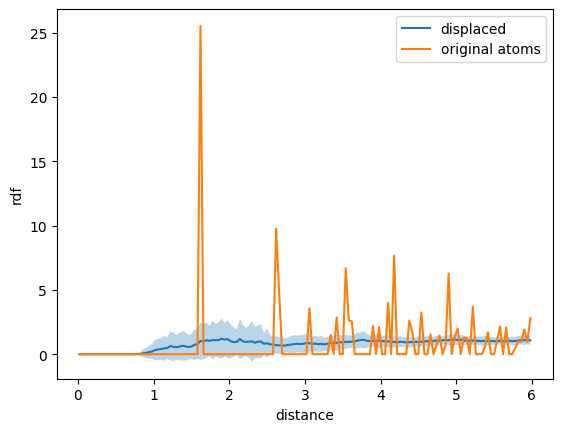

In [ ]:
# plot rdf
fig, ax = plt.subplots()
ax.plot(distance, rdf_list.mean(axis=0), label='displaced')
ax.fill_between(distance, rdf_list.mean(axis=0) - rdf_list.std(axis=0), rdf_list.mean(axis=0) + rdf_list.std(axis=0), alpha=0.3)

# plot original atoms rdf
original_atoms_rdf = get_rdf(original_atoms, bins=150).xy()
ax.plot(original_atoms_rdf[:, 0], original_atoms_rdf[:, 1], label='original atoms')
ax.legend()
ax.set_xlabel('distance')
ax.set_ylabel('rdf')
plt.show()

In [ ]:
import pickle

path2save = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/SiO2/alpha-quartz__mp-6930/atoms"
for i, atoms in enumerate(all_atoms):
    path2target = os.path.join(path2save, f"ase_atoms_{i}")
    if not os.path.exists(path2target):
        os.makedirs(path2target)
    # save atoms as pkl
    with open(os.path.join(path2target, "atoms.pkl"), 'wb') as f:
        pickle.dump(atoms, f)

In [ ]:
path_scf_input_template = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/SiO2/amorphous/input"
path_root_result = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/SiO2/amorphous/result_sq"
path2atoms = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/SiO2/amorphous/atoms"

with open(f'{path_scf_input_template}/scf.in') as f:
    original_scf_input_lines = [s.strip() for s in f.readlines()]

for i, atoms in enumerate(all_atoms):
    writer = QuantumEspressoWriter(atoms, path_scf_input_template)
    scf_input_lines = writer.output()

    # create dir
    path2result = f'{path_root_result}/scf_{i}'
    if not os.path.exists(path2result):
        os.makedirs(path2result)
    else:
        print(f'{path2result} already exists')

    # write scf.in
    with open(f'{path2result}/scf.in', 'w') as f:
        f.writelines('\n'.join(scf_input_lines))